# Anti Money Laundering (AML) Fraud Detection


        Life cycle of Machine Learning Project:

            1. Understanding the Problem Statement

            2. Data Collection

            3. Data Checks to perform

            4. Exploratory Data Analysis

            5. Data Pre-Processing

            6. Model Evaluation and Training

            7. Choose Best Model


## 1. Problem Statement

Money laundering is a multi-billion dollar issue. Detection of laundering is very difficult. Most automated algorithms have a high false positive rate: legitimate transactions incorrectly flagged as laundering. The converse is also a major problem -- false negatives, i.e. undetected laundering transactions. Naturally, criminals work hard to cover their tracks.

Access to real financial transaction data is highly restricted -- for both proprietary and privacy reasons. Even when access is possible, it is problematic to provide a correct tag (laundering or legitimate) to each transaction -- as noted above. This synthetic transaction data from IBM avoids these problems.

The data provided here is based on a virtual world inhabited by individuals, companies, and banks.

## 2. Data Collection
- Data source: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/data

### 2.1 Import Required Packages

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

### 2.2 Import Data

In [2]:
import os
# Get the current working directory
cwd = os.getcwd()
print(cwd)

# Navigate to the data folder
data_folder = os.path.abspath(os.path.join(cwd, "data"))
print(data_folder)

csv_file = os.path.join(data_folder, "HI-Small_Trans.csv")
print(csv_file)

/Users/robins/Desktop/Robins World/Data Science - Machine Learning Prep/01 - MLOps/AML-Fraud-Detection/notebook
/Users/robins/Desktop/Robins World/Data Science - Machine Learning Prep/01 - MLOps/AML-Fraud-Detection/notebook/data
/Users/robins/Desktop/Robins World/Data Science - Machine Learning Prep/01 - MLOps/AML-Fraud-Detection/notebook/data/HI-Small_Trans.csv


In [3]:
# Load the CSV file into a pandas DataFrame
aml_trans_df = pd.read_csv(csv_file)
# display(aml_trans_df.head())
print(f"Shape of data:  \n No. of records: {aml_trans_df.shape[0]} \n No. features: {aml_trans_df.shape[1]}")

Shape of data:  
 No. of records: 5078345 
 No. features: 11


In [4]:
# Take small sample of data from the original data
aml_trans_sm_df = aml_trans_df.sample(n=50000, random_state=6)
print(f"Shape of data:  \n No. of records: {aml_trans_sm_df.shape[0]} \n No. features: {aml_trans_sm_df.shape[1]}")

Shape of data:  
 No. of records: 50000 
 No. features: 11


#### Show Top 5 records

In [5]:
aml_trans_sm_df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3507139,2022/09/07 12:15,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0
2054082,2022/09/03 21:15,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0
4745576,2022/09/09 19:22,338871,8144F97F0,15964,8144FEB20,80.84,Euro,80.84,Euro,Credit Card,0
1999193,2022/09/03 14:11,70,1004286A8,1502,812191060,46480.59,Euro,46480.59,Euro,Cheque,0
800550,2022/09/01 14:46,1,803A2CC10,130342,80C982930,118.46,US Dollar,118.46,US Dollar,Cheque,0


In [6]:
aml_trans_sm_df["Is Laundering"].value_counts()

Is Laundering
0    49946
1       54
Name: count, dtype: int64

In [7]:
aml_trans_sm_df[aml_trans_sm_df["Is Laundering"] == 1].head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
5018320,2022/09/13 18:11,2824,805DFF260,13083,803CF7A80,10446084.19,Euro,10446084.19,Euro,ACH,1
2192347,2022/09/04 12:14,214615,80E9CE540,10232,808FADF50,10162.68,US Dollar,10162.68,US Dollar,ACH,1
2327289,2022/09/05 01:16,26302,809CD43C0,25534,809CD5510,744.53,Canadian Dollar,744.53,Canadian Dollar,ACH,1
2456084,2022/09/06 12:07,13078,804F0BFF0,16011,807B0DEE0,12168.29,Euro,12168.29,Euro,ACH,1
3117676,2022/09/07 06:33,1655,8014E2420,22775,80104C350,458.65,Euro,458.65,Euro,ACH,1


### 2.2 Dataset Information

- `Timestamp` - Year/Month/Day Hour/Minute
- `From Bank` - Numeric code for bank where transaction originates
- `Account` - Hexadecimal code for account where transaction originates
- `To Bank` - Numeric code for bank where transaction ends
- `Account.1` - Hexadecimal code for account where transaction ends
- `Amount Received` - Monetary amount received in From account (in currency units of the next column)
- `Receiving Currency` - Currency such as dollars, euros, etc of From account
- `Amount Paid` - Monetary amount paid (in currency units of the next column)
- `Payment Currency` - Currency such as dollars, euros, etc of From account
- `Payement Format` - How transaction was conducted, e.g. cheque, ACH, wire, credit cards, etc.
- `Is Laundering` - Target variable

## 3 Data Checks to perform
- Check Duplicates
- Check Missing Values
- Check Data Types
- Check the number of unique values of each column
- Check Statitics of Data
- Check various categories present in the different column

### 3.1 Check Duplicates

In [8]:
aml_trans_sm_df.duplicated(keep="first").sum()

np.int64(0)

### 3.2 Check Missing values

In [9]:
aml_trans_sm_df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

### 3.3 Check Data Types

In [10]:
aml_trans_sm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 3507139 to 3159372
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           50000 non-null  object 
 1   From Bank           50000 non-null  int64  
 2   Account             50000 non-null  object 
 3   To Bank             50000 non-null  int64  
 4   Account.1           50000 non-null  object 
 5   Amount Received     50000 non-null  float64
 6   Receiving Currency  50000 non-null  object 
 7   Amount Paid         50000 non-null  float64
 8   Payment Currency    50000 non-null  object 
 9   Payment Format      50000 non-null  object 
 10  Is Laundering       50000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.6+ MB


### 3.4 Checking the number of unique values of each column

In [11]:
aml_trans_sm_df.nunique()

Timestamp             13022
From Bank              3494
Account               37420
To Bank                2161
Account.1             44258
Amount Received       44567
Receiving Currency       15
Amount Paid           44618
Payment Currency         15
Payment Format            7
Is Laundering             2
dtype: int64

### 3.5 Check Statistics of the Data set

In [12]:
# Statistics of the Numerical columns
aml_trans_sm_df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
From Bank,50000.0,4.634242e+04,8.244610e+04,1.000000,124.0000,10232.000,28694.0000,3.562190e+05
To Bank,50000.0,6.604474e+04,8.441844e+04,1.000000,4503.0000,21575.000,122352.0000,3.562190e+05
Amount Received,50000.0,1.598001e+07,2.129876e+09,0.000001,183.6175,1387.060,12332.7175,4.536185e+11
Amount Paid,50000.0,1.551440e+07,2.129498e+09,0.000001,184.4375,1391.025,12292.8175,4.536185e+11
Is Laundering,50000.0,1.080000e-03,3.284593e-02,0.000000,0.0000,0.000,0.0000,1.000000e+00


In [13]:
# Statistics of the Categorical columns
aml_trans_sm_df.describe(include=np.object_).T

,count,unique,top,freq
Timestamp,50000,13022,2022/09/01 00:00,126
Account,50000,37420,100428660,1633
Account.1,50000,44258,100428660,18
Receiving Currency,50000,15,US Dollar,18577
Payment Currency,50000,15,US Dollar,18732
Payment Format,50000,7,Cheque,18194


In [14]:
pd.to_datetime(aml_trans_sm_df["Timestamp"]).describe()

count                         50000
mean     2022-09-05 07:06:18.866400
min             2022-09-01 00:00:00
25%             2022-09-02 03:50:00
50%             2022-09-05 12:16:00
75%             2022-09-08 03:16:00
max             2022-09-14 13:27:00
Name: Timestamp, dtype: object

In [15]:
aml_trans_sm_df.head(2)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3507139,2022/09/07 12:15,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0
2054082,2022/09/03 21:15,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0


## 4. Exploring Data (Visualization)

In [16]:
aml_trans_sm_df.columns = aml_trans_sm_df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')
aml_trans_sm_df.columns 

Index(['timestamp', 'from_bank', 'account', 'to_bank', 'account_1',
       'amount_received', 'receiving_currency', 'amount_paid',
       'payment_currency', 'payment_format', 'is_laundering'],
      dtype='object')

In [17]:
df = aml_trans_sm_df.copy()
print(f"Dimension of the data: {df.shape}")

Dimension of the data: (50000, 11)


In [18]:
# Convert the "Timestamp" column to datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extract date, day, and time from the Timestamp
df["date"] = df["timestamp"].dt.date
df["day"] = df["timestamp"].dt.day_name()
df["time"] = df["timestamp"].dt.time

df.drop(columns=["timestamp"], inplace=True)

df.head(2)

,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering,date,day,time
3507139,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0,2022-09-07,Wednesday,12:15:00
2054082,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0,2022-09-03,Saturday,21:15:00


### Basic exploration

In [19]:
# Numerical and Categorical columns
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include=object).columns.tolist()

print(f"There are {len(numeric_features)} Numerical Features: {numeric_features}")
print(f"There are {len(categorical_features)} Categorical Features: {categorical_features}")

There are 5 Numerical Features: ['from_bank', 'to_bank', 'amount_received', 'amount_paid', 'is_laundering']
There are 8 Categorical Features: ['account', 'account_1', 'receiving_currency', 'payment_currency', 'payment_format', 'date', 'day', 'time']


In [20]:
# Proportion of count data on categorical columns
for col in categorical_features:
    print(f"{df[col].value_counts(dropna=False)}")
    print(f"------------------------------------")

account
100428660    1633
1004286A8     966
100428978     200
1004286F0     188
100428810     176
             ... 
80499C410       1
808698560       1
800DF1710       1
80E0E8A50       1
804B39FD0       1
Name: count, Length: 37420, dtype: int64
------------------------------------
account_1
100428660    18
1004286A8     7
802348C20     5
803962460     5
802C1AAC0     5
             ..
8086B7950     1
808142E90     1
804EE9800     1
809E02110     1
804AB4820     1
Name: count, Length: 44258, dtype: int64
------------------------------------
receiving_currency
US Dollar            18577
Euro                 11488
Swiss Franc           2275
Yuan                  2098
Shekel                1912
Rupee                 1882
UK Pound              1776
Bitcoin               1539
Yen                   1511
Ruble                 1505
Australian Dollar     1386
Canadian Dollar       1362
Mexican Peso          1075
Saudi Riyal            871
Brazil Real            743
Name: count, dtype: int64
--

##### Insights
- `timestamp` have so many unique values - this will not add importance during model learning

### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

##### Other type of Analysis are
- **Bivariate Analysis**: The analysis of two variables.
- **Multivariate Analysis**: The analysis of two or more variables.

#### Numerical Features

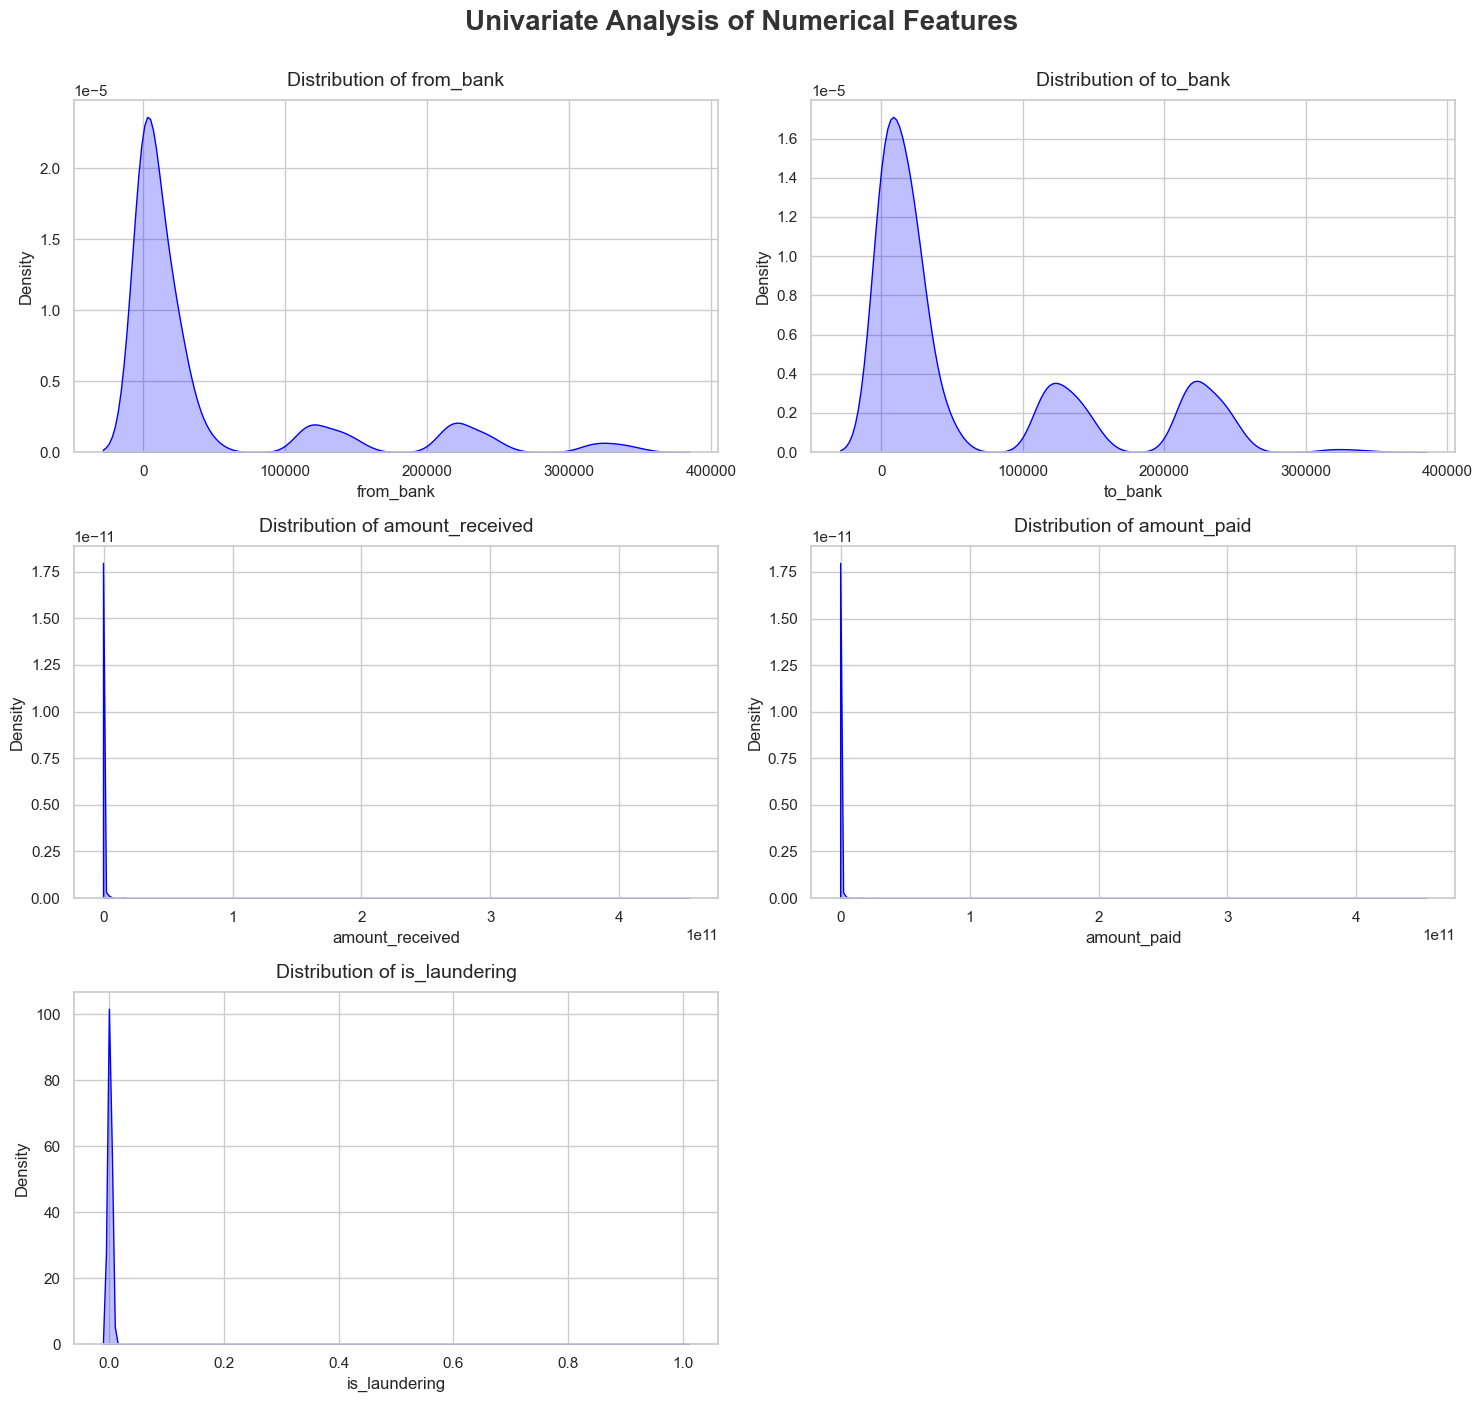

In [21]:
# Create a figure with subplots
plt.figure(figsize=(15, 14))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.0)

# Loop through each numerical feature and create a KDE plot
for i in range(len(numeric_features)):
    sns.set_theme(style="whitegrid")
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns, i+1-th subplot
    sns.kdeplot(x=df[numeric_features[i]], color='blue', fill=True)  # Add `fill=True` for better visualization
    plt.xlabel(numeric_features[i], fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title(f"Distribution of {numeric_features[i]}", fontsize=14, pad=10)  # Add a title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show() 

<Figure size 640x480 with 0 Axes>

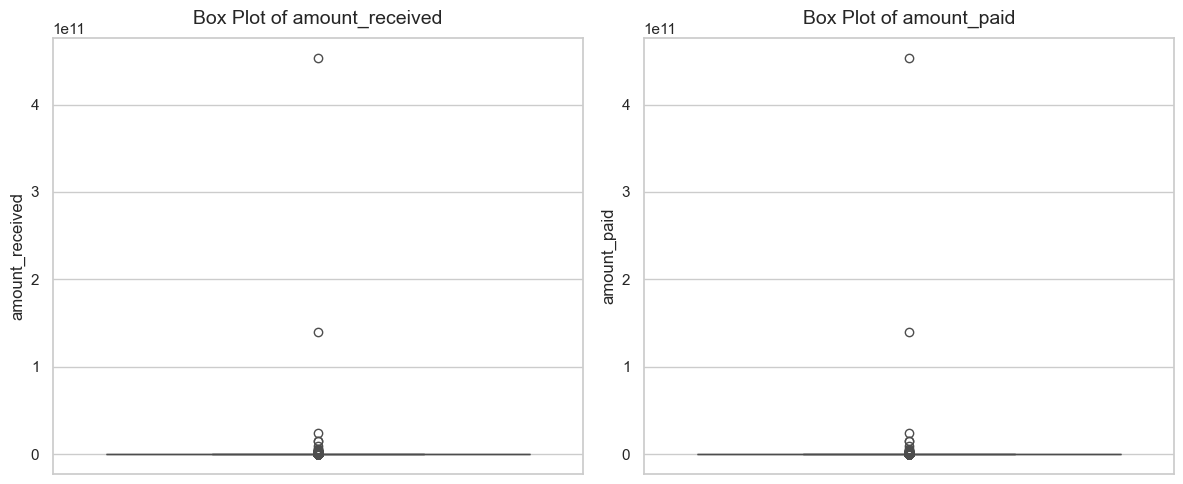

In [22]:
# Create a figure with subplots
# plt.figure(figsize=(15, 14))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.0)

numeric_features_new = ['amount_received', 'amount_paid']

# Set theme
sns.set_theme(style="whitegrid")

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
# Loop through numerical features and plot Box Plot
for i, feature in enumerate(numeric_features_new):
    sns.boxplot(y=df[feature], color='blue', ax=axes[i])
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].set_title(f"Box Plot of {feature}", fontsize=14, pad=10)

plt.tight_layout()
plt.show()

#### Catgegorical Features

In [23]:

# # Create a figure with subplots
# plt.figure(figsize=(15, 15))
# plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.0)

# # Loop through each categorical feature and create a bar plot
# for i in range(len(categorical_features)):
#     plt.subplot(4, 4, i + 1)  # 4 rows, 4 columns, i+1-th subplot
#     sns.set_theme(style="whitegrid")
    
#     # Get value counts for the categorical feature
#     var = df[categorical_features[i]].value_counts()
#     print(var)  # Print value counts for reference
    
#     # Create bar plot with hue and palette
#     ax = sns.barplot(x=var.index, y=var.values, hue=var.index, palette="viridis", legend=False)
    
#     # Add labels and title
#     plt.xlabel(categorical_features[i], fontsize=12)
#     plt.ylabel("Count", fontsize=12)
#     plt.title(f"Distribution of {categorical_features[i]}", fontsize=14, pad=10)  # Add a title for each subplot
    
#     # Rotate x-axis labels if needed
#     plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

    

##### Insights
- 

### Multivariate Analysis

##### `Day` with Money Laundering

Fraudulent Transactions by Day:
 day
Sunday       10
Wednesday    10
Saturday      9
Thursday      9
Monday        6
Tuesday       5
Friday        5
Name: count, dtype: int64

Non-Fraudulent Transactions by Day:
 day
Thursday     15909
Friday       13860
Wednesday     4749
Monday        4697
Tuesday       4688
Saturday      3987
Sunday        2056
Name: count, dtype: int64


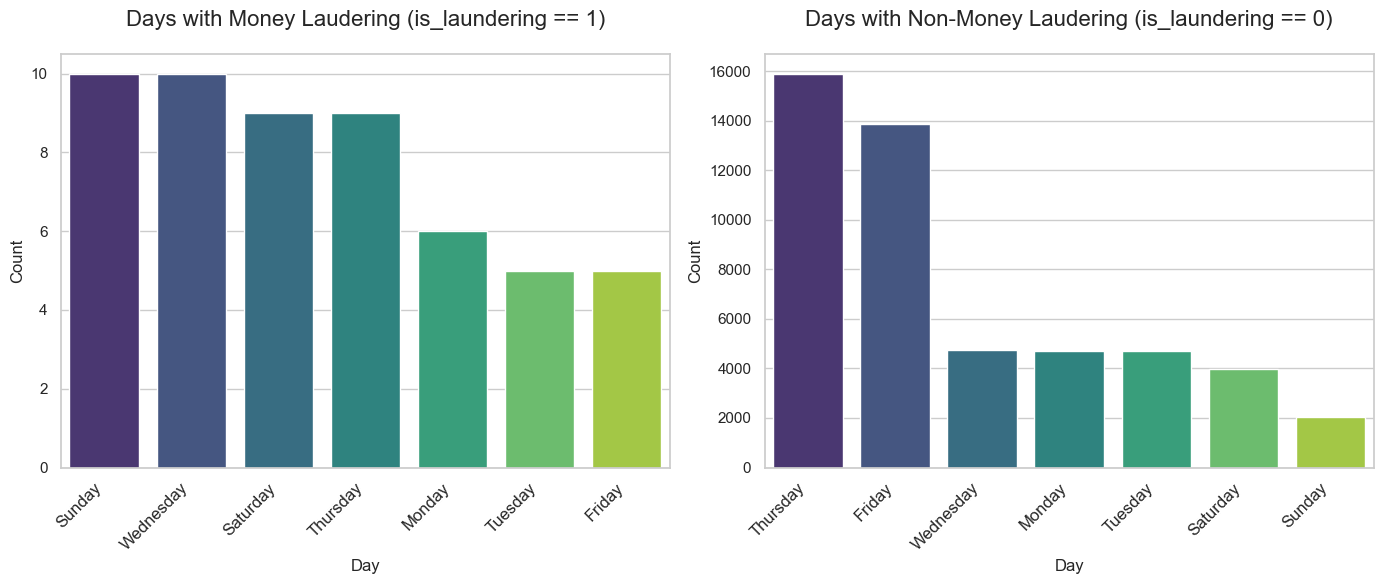

In [24]:
# # Bar plot
# day = df[df["is_laundering"]==1]["day"].value_counts()
# # print(f"{day}")

# plt.figure(figsize=(7,4))
# sns.set_theme(style="whitegrid")
# ax = sns.barplot(x=day.index, y=day.values, hue=day.index, palette="viridis")
# plt.title("Days with Money Laudering")
# plt.xlabel("Day")
# plt.ylabel("Count")
# plt.show()

# Filter data for fraudulent and non-fraudulent transactions
fraud_day = df[df["is_laundering"] == 1]["day"].value_counts()
non_fraud_day = df[df["is_laundering"] == 0]["day"].value_counts()

# Print the value counts for reference
print("Fraudulent Transactions by Day:\n", fraud_day)
print("\nNon-Fraudulent Transactions by Day:\n", non_fraud_day)

# Create a single figure with two subplots
plt.figure(figsize=(14, 6))  # Adjust figure size for better subplot spacing and readability
sns.set_theme(style="whitegrid")

# Use gridspec to create subplots with different widths
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 2, width_ratios=[1, 1])  # equal width for both graphs.

# Subplot 1: Fraudulent Transactions (narrower)
plt.subplot(gs[0])  # First subplot
ax1 = sns.barplot(x=fraud_day.index, y=fraud_day.values, hue=fraud_day.index, palette="viridis", legend=False)
plt.title("Days with Money Laudering (is_laundering == 1)", fontsize=16, pad=20)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability


# Subplot 2: Non-Fraudulent Transactions (wider)
plt.subplot(gs[1])  # Second subplot
ax2 = sns.barplot(x=non_fraud_day.index, y=non_fraud_day.values, hue=non_fraud_day.index, palette="viridis", legend=False)
plt.title("Days with Non-Money Laudering (is_laundering == 0)", fontsize=16, pad=20)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability


# Adjust layout and display
plt.tight_layout()
plt.show()

##### `Payment Format` with Money Laundering

Fraudulent Transactions:
 payment_format
ACH            51
Cheque          2
Credit Card     1
Name: count, dtype: int64

Non-Fraudulent Transactions:
 payment_format
Cheque          18192
Credit Card     12929
ACH              5978
Cash             4849
Reinvestment     4753
Wire             1727
Bitcoin          1518
Name: count, dtype: int64


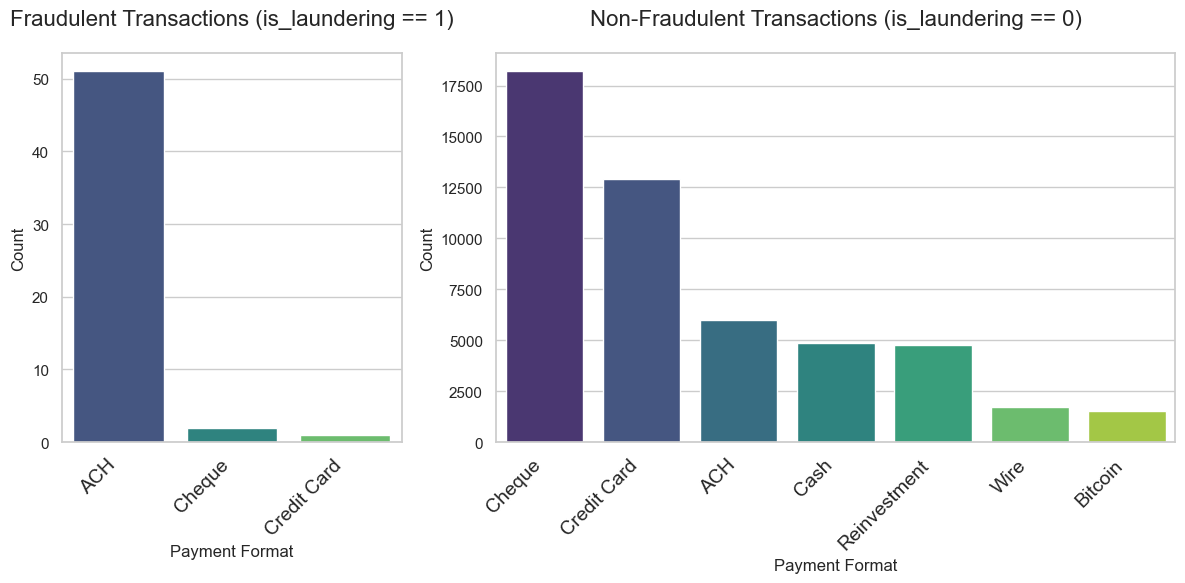

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for fraudulent and non-fraudulent transactions
fraud_payment_format = df[df["is_laundering"] == 1]["payment_format"].value_counts()
non_fraud_payment_format = df[df["is_laundering"] == 0]["payment_format"].value_counts()

# Print the value counts for reference
print("Fraudulent Transactions:\n", fraud_payment_format)
print("\nNon-Fraudulent Transactions:\n", non_fraud_payment_format)

# Create a single figure with two subplots of different widths
plt.figure(figsize=(12, 6))  # Overall figure size
sns.set_theme(style="whitegrid")

# Use gridspec to create subplots with different widths
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 2, width_ratios=[1, 2])  # Width ratio: 1 for fraud, 2 for non-fraud

# Subplot 1: Fraudulent Transactions (narrower)
plt.subplot(gs[0])  # First subplot with smaller width
ax1 = sns.barplot(x=fraud_payment_format.index, y=fraud_payment_format.values, hue=fraud_payment_format.index, palette="viridis", legend=False)
plt.title("Fraudulent Transactions (is_laundering == 1)", fontsize=16, pad=20)
plt.xlabel("Payment Format", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=14)

# Subplot 2: Non-Fraudulent Transactions (wider)
plt.subplot(gs[1])  # Second subplot with larger width
ax2 = sns.barplot(x=non_fraud_payment_format.index, y=non_fraud_payment_format.values, hue=non_fraud_payment_format.index, palette="viridis", legend=False)
plt.title("Non-Fraudulent Transactions (is_laundering == 0)", fontsize=16, pad=20)
plt.xlabel("Payment Format", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=14)# Rotate x-axis labels for better readability

# Adjust layout and display
plt.tight_layout()
plt.show()

##### `Bank` with Money Laundering

Top 5 Banks for Fraudulent Transactions:
 from_bank
70        3
1         3
4         2
2824      1
249407    1
Name: count, dtype: int64

Top 5 Banks for Non-Fraudulent Transactions:
 from_bank
70    4368
12     793
10     777
1      584
15     510
Name: count, dtype: int64


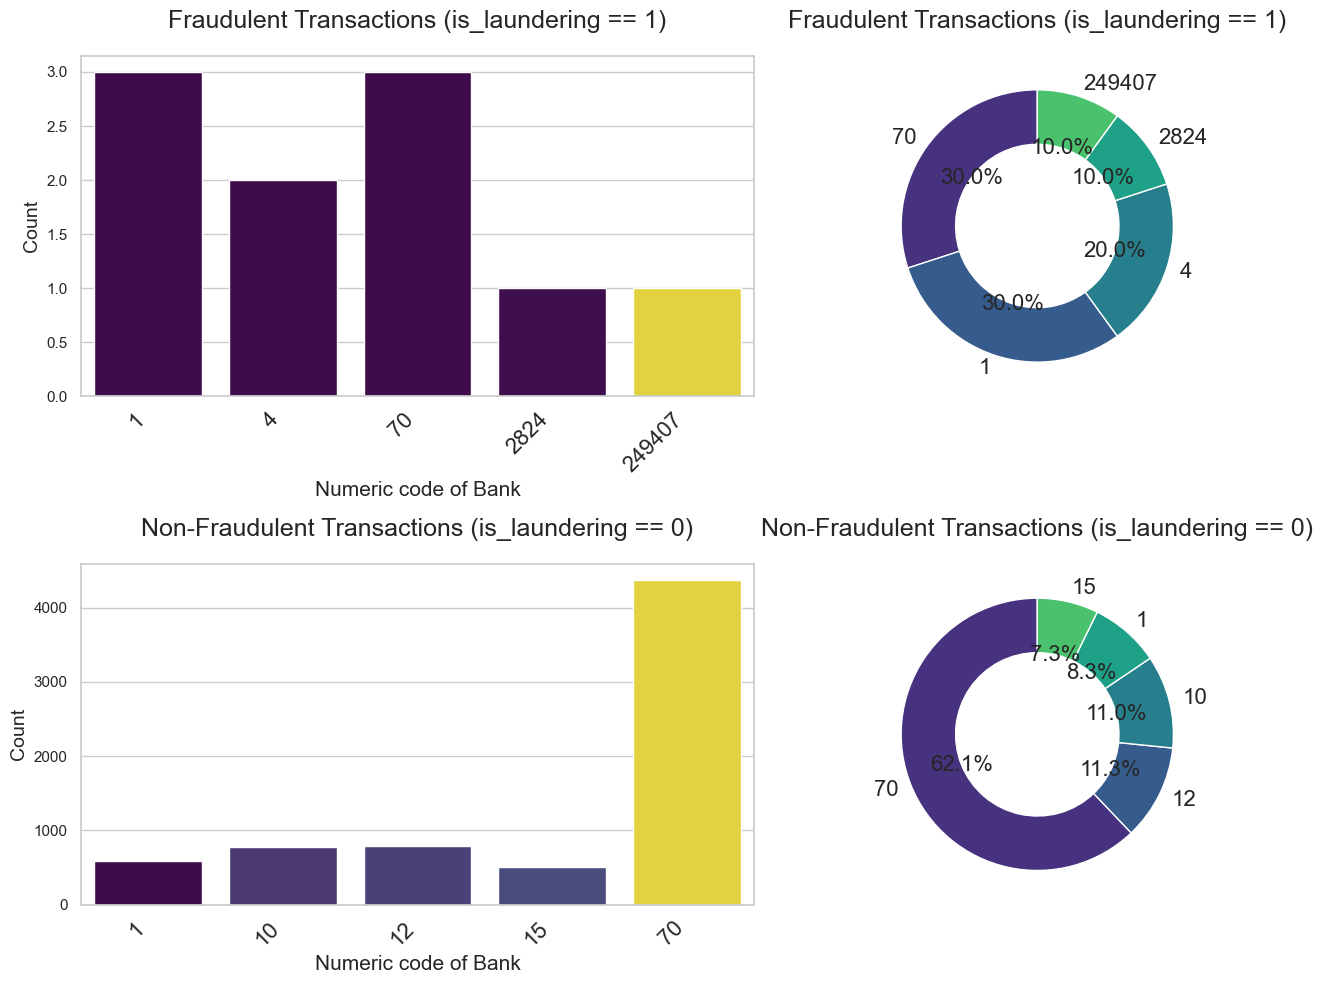

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter data for fraudulent and non-fraudulent transactions
fraud_from_bank = df[df["is_laundering"] == 1]["from_bank"].value_counts().head()
non_fraud_from_bank = df[df["is_laundering"] == 0]["from_bank"].value_counts().head()

# Print the value counts for reference
print("Top 5 Banks for Fraudulent Transactions:\n", fraud_from_bank)
print("\nTop 5 Banks for Non-Fraudulent Transactions:\n", non_fraud_from_bank)

# Set up the figure and subplots
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")

# Bar Plot for Fraudulent Transactions
plt.subplot(2, 2, 1)
ax = sns.barplot(x=fraud_from_bank.index, y=fraud_from_bank.values, hue=fraud_from_bank.index, palette="viridis", legend=False)
# Adjust bar width (applies to ALL bars in the current plot)
# for bar in ax.patches:
#     bar.set_width(0.3)
plt.title("Fraudulent Transactions (is_laundering == 1)", fontsize=18, pad=20)
plt.xlabel("Numeric code of Bank", fontsize=15)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=16)

# Bar Plot for Non-Fraudulent Transactions
plt.subplot(2, 2, 3)
ax = sns.barplot(x=non_fraud_from_bank.index, y=non_fraud_from_bank.values, hue=non_fraud_from_bank.index, palette="viridis", legend=False)
# Adjust bar width
# Adjust bar width (applies to ALL bars in the current plot)
# for bar in ax.patches:
#     bar.set_width(0.3)
plt.title("Non-Fraudulent Transactions (is_laundering == 0)", fontsize=18, pad=20)
plt.xlabel("Numeric code of Bank", fontsize=15)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=16)

# Donut Plot for Fraudulent Transactions
plt.subplot(2, 2, 2)
plt.pie(fraud_from_bank.values, 
        labels=fraud_from_bank.index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("viridis"), 
        startangle=90, 
        wedgeprops=dict(width=0.4),
        textprops={'fontsize': 16} )
plt.title("Fraudulent Transactions (is_laundering == 1)", fontsize=18, pad=20)

# Donut Plot for Non-Fraudulent Transactions
plt.subplot(2, 2, 4)
plt.pie(non_fraud_from_bank.values, 
        labels=non_fraud_from_bank.index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("viridis"), 
        startangle=90, 
        wedgeprops=dict(width=0.4),
        textprops={'fontsize': 16} )
plt.title("Non-Fraudulent Transactions (is_laundering == 0)", fontsize=18, pad=20)

# Adjust layout and display
plt.tight_layout()
plt.show()

The **ACH payment format** is more susceptible to money laundering than methods like checks, credit cards, or Bitcoin due to:

1. **High Volume & Low Scrutiny**: Massive transaction volumes make monitoring difficult.
2. **Ease of Use**: Simple setup and widespread use allow criminals to blend in.
3. **Delayed Detection**: Batch processing and reversibility slow fraud detection.
4. **Lack of Real-Time Monitoring**: Transactions aren’t tracked as closely as credit cards or Bitcoin.
5. **Exploitation of Business Accounts**: Higher limits and fewer restrictions make businesses easy targets.
6. **Complex Transaction Chains**: Criminals layer funds through multiple accounts to obscure origins.

### Why Others Are Less Vulnerable:
- **Checks**: Require manual processing and leave paper trails.
- **Credit Cards**: Have real-time fraud detection and chargeback systems.
- **Bitcoin**: Blockchain transparency and strict regulations make tracing easier.

### Mitigation:
- Enhance monitoring, use strong authentication, set transaction limits, and comply with AML/KYC regulations.

In short, ACH’s convenience and lower scrutiny make it a prime target for money laundering compared to other methods.

##### `Payment Currency` used in Money Laundering

Payment Currency in Fraudulent Transactions:
 payment_currency
US Dollar            26
Euro                 11
Ruble                 4
UK Pound              3
Canadian Dollar       2
Yuan                  2
Swiss Franc           2
Australian Dollar     2
Yen                   1
Saudi Riyal           1
Name: count, dtype: int64


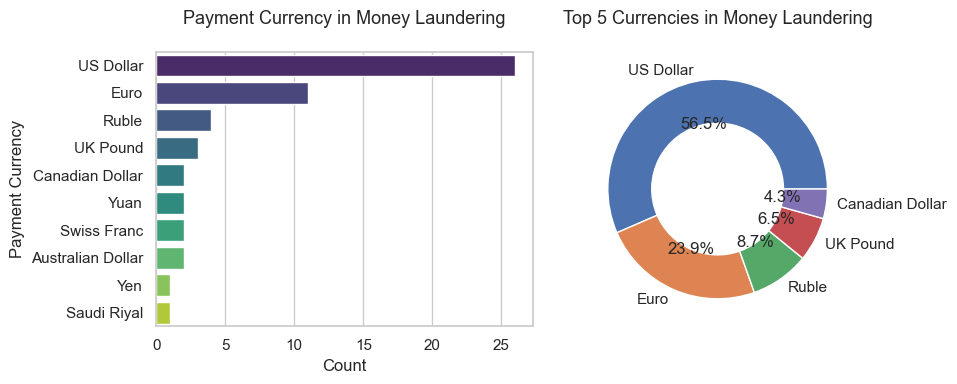

In [27]:
# Filter data for fraudulent transactions
payment_currency = df[df["is_laundering"] == 1]["payment_currency"].value_counts()

# Print the value counts for reference
print("Payment Currency in Fraudulent Transactions:\n", payment_currency)

# Create a figure with two subplots
plt.figure(figsize=(10, 4))

# Subplot 1: Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=payment_currency.values, y=payment_currency.index, hue=payment_currency.index, palette="viridis", legend=False)
plt.title("Payment Currency in Money Laundering", fontsize=13, pad=20)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Payment Currency", fontsize=12)

# Subplot 2: Pie chart (Top 5 currencies)
plt.subplot(1, 2, 2)
top_5_currency = payment_currency.head()  # Get the top 5 currencies
plt.title("Top 5 Currencies in Money Laundering", fontsize=13, pad=20)
plt.pie(top_5_currency.values, labels=top_5_currency.index, autopct="%1.1f%%", wedgeprops=dict(width=0.4))

# Adjust layout
plt.tight_layout()
plt.show()

#### Check Mutlicollinearity in Numerical features


- VIF is used to assess the multicollinearity among the independent (predictor) variables
- VIF measures how much the variance of a coefficient is inflated due to correlations with other predictors

In [28]:
df_numeric_features = df.select_dtypes(include=[np.number]).drop(columns = ["is_laundering"])
# Add a constant to the model
X = add_constant(df_numeric_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           feature          VIF
0            const     1.738639
1        from_bank     1.087235
2          to_bank     1.087288
3  amount_received  2854.323471
4      amount_paid  2854.319113


##### Insights
- VIF = 1: No multicollinearity.
- 1 < VIF < 5: Moderate multicollinearity.
- VIF > 5: High multicollinearity.

- `amount_received` and `amount_paid` are high correlated, therefore one of them need to be droped.

#### Check Mutlicollinearity in Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis ($H_{0}$): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($H_{1}$): The Feature and target column are not independent (Correlated)

In [29]:
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['is_laundering'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis - There is a relationship')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis - There is no relationship')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,account,Reject Null Hypothesis - There is a relationship
1,account_1,Reject Null Hypothesis - There is a relationship
2,receiving_currency,Fail to Reject Null Hypothesis - There is no r...
3,payment_currency,Fail to Reject Null Hypothesis - There is no r...
4,payment_format,Reject Null Hypothesis - There is a relationship
5,date,Reject Null Hypothesis - There is a relationship
6,day,Reject Null Hypothesis - There is a relationship
7,time,Reject Null Hypothesis - There is a relationship


##### Insights
- Here `receiving_currency` and `payement_curreny` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.
- `receiving_currency` and `payement_curreny` are important features for model trainig and predictions

#### Distribution Numerical Features by Is Laundering?

In [30]:
# continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :', df_numeric_features.columns)

Num of continues features : Index(['from_bank', 'to_bank', 'amount_received', 'amount_paid'], dtype='object')


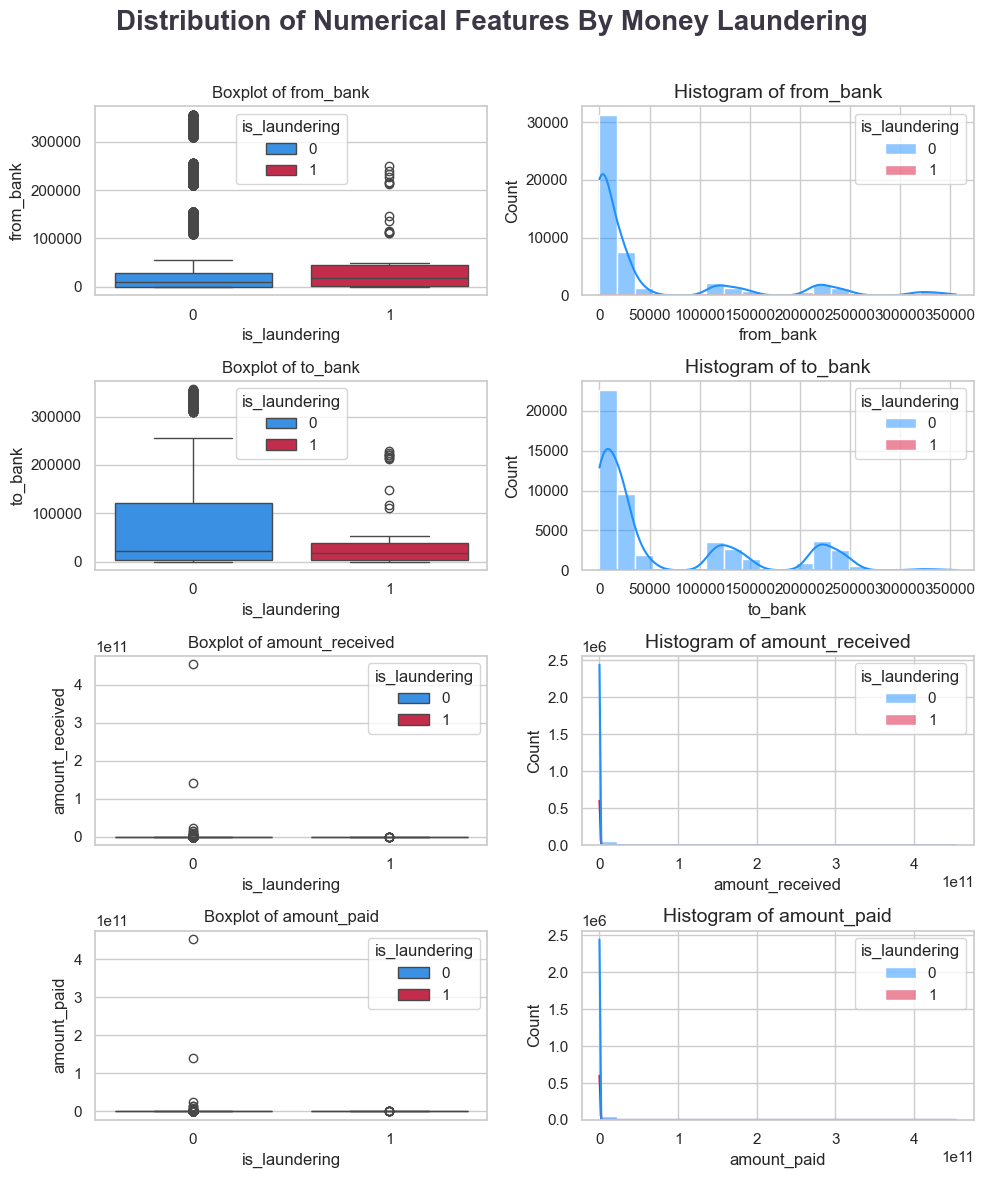

In [31]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(4, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Money Laundering', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(df_numeric_features.columns):   
    sns.boxplot(data=df, x='is_laundering', y=col,  hue='is_laundering', palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='is_laundering', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

#### Initial Analysis Report
- `timestamp` column can be deleted because there are so many unique values
- `receiving_currency` and `payement_curreny` are important features for model trainig and predictions
- `amount_received` and `amount_paid` are high correlated, therefore one of them need to be droped.
- 

### 4.1 Target Variables Analysis

is_laundering
0    49946
1       54
Name: count, dtype: int64


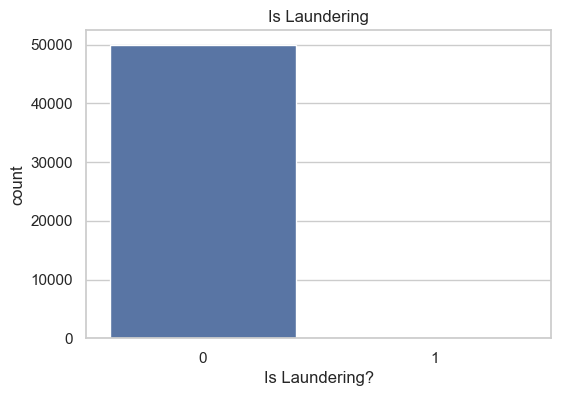

In [32]:
# Exploring the target variable "Is Laundering"
print(aml_trans_sm_df["is_laundering"].value_counts(dropna=False))

# Bar plot
plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_laundering", data=aml_trans_sm_df)
plt.title("Is Laundering")
plt.xlabel("Is Laundering?")
plt.show()

### Final Report
- 

## 5. Data preprocessing or Feature Engineering

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder, CountEncoder

from sklearn.model_selection import train_test_split

#### Train and Test dataset

In [34]:
#### Train and Test dataset split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.head(2)

,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering,date,day,time
1485112,353132,814282F31,255063,814282BC1,0.02664,Bitcoin,0.02664,Bitcoin,Bitcoin,0,2022-09-02,Friday,11:26:00
1258048,29003,80B58DFD0,123390,80EC2ACA0,91604.31000,US Dollar,91604.31000,US Dollar,ACH,0,2022-09-02,Friday,04:29:00


####  Independent features and Dependent variable

In [35]:
# Dividing into Independent features and Dependent feature
target_column_name = "is_laundering"
drop_columns = [target_column_name, "date", "time", "amount_paid"]
input_features_train_df = train_df.drop(columns=drop_columns, axis=1)
target_feature_train_df = train_df[target_column_name]

input_features_test_df = test_df.drop(columns=drop_columns, axis=1)
target_feature_test_df = test_df[target_column_name]

In [36]:
numerical_features = input_features_train_df.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)
categorical_features = input_features_train_df.select_dtypes(include=object).columns.tolist()
print(categorical_features)

['from_bank', 'to_bank', 'amount_received']
['account', 'account_1', 'receiving_currency', 'payment_currency', 'payment_format', 'day']


#### Defining Pipeline

In [37]:
""" 
    - Preprocessing datasets for modeling
    - Imputing, Scaling and encoding  
"""
def num_cat_transformer(numerical_features, categorical_features):
    # Preprocessing for numerical features:
    num_transformer = make_pipeline(
        SimpleImputer(strategy='median'),  # Impute missing values with median
        RobustScaler()  # Scale numerical features
    )
    
    # Preprocessing for categorical features:
    # Frequency Encoding for high cardinality features
    freq_encoder = CountEncoder(normalize=True)  # Normalize frequency encoding
    # One-Hot Encoding for low cardinality features
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

    # Apply different encodings to different categorical features
    cat_transformer = make_column_transformer(
        (freq_encoder, ['account', 'account_1']),  # Frequency Encoding for account and account_1
        (one_hot_encoder, ['receiving_currency', 'payment_currency', 'payment_format', 'day']),  # One-Hot Encoding for others
        remainder="drop"  # Drop columns not explicitly transformed
    )

    column_transformer = make_column_transformer(
        (num_transformer, numerical_features),  # Apply numerical transformer to numerical features
        (cat_transformer, categorical_features),  # Apply categorical transformer to categorical features
        remainder="drop"  # Drop columns not explicitly transformed
    )
    
    return column_transformer


#### Applying the column transformer to both Train and Test

In [38]:
column_transformer_tn = num_cat_transformer(numerical_features, categorical_features)
input_features_train_array = column_transformer_tn.fit_transform(input_features_train_df)
input_features_train_array = input_features_train_array.toarray()  # Convert to dense array
print("Encoded and Scaled of the Train dataset ")
display(pd.DataFrame(input_features_train_array).head())

input_features_test_array = column_transformer_tn.transform(input_features_test_df)
input_features_test_array = input_features_test_array.toarray()    # Convert to dense array
print("Encoded and Scaled of the Test dataset ")
display(pd.DataFrame(input_features_test_array).head())

Encoded and Scaled of the Train dataset 


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,12.006860,1.981475,-0.113073,0.000025,0.000025,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.662969,0.864077,7.321705,0.000025,0.000025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.667693,1.889222,0.061059,0.000025,0.000025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.231617,-0.034063,8.689518,0.000025,0.000100,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.344731,0.027249,0.501891,0.000025,0.000025,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Encoded and Scaled of the Test dataset 


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.828299,0.103183,1.227359,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.652154,0.853563,-0.099347,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.349631,-0.072226,1.500295,0.019825,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.351766,-0.182953,0.567904,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.287229,-0.032578,-0.105046,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
print("Shape of input_features_train_array:", input_features_train_array.shape)
print("Shape of target_feature_train_df:", target_feature_train_df.shape)

Shape of input_features_train_array: (40000, 49)
Shape of target_feature_train_df: (40000,)


In [40]:
print("Shape of input_features_test_array:", input_features_test_array.shape)
print("Shape of target_feature_test_df:", target_feature_test_df.shape)

Shape of input_features_test_array: (10000, 49)
Shape of target_feature_test_df: (10000,)


In [41]:
# Ensure target features are 2D arrays
target_feature_train_array = np.array(target_feature_train_df).reshape(-1, 1)
target_feature_test_array = np.array(target_feature_test_df).reshape(-1, 1)
print("Shape of input_features_test_array:", target_feature_train_array.shape)
print("Shape of target_feature_test_df:", target_feature_test_array.shape)

Shape of input_features_test_array: (40000, 1)
Shape of target_feature_test_df: (10000, 1)


In [42]:
# concatenating all input features and target feature along column wise
train_arr = np.c_[input_features_train_array, target_feature_train_array]
test_arr = np.c_[input_features_test_array, target_feature_test_array]

#### Save Train and Test data array

In [43]:
# Save the arrays separately
np.save('train_array.npy', train_arr)
np.save('test_array.npy', test_arr)

#### Load Train and Test data array

In [44]:
# Load individual arrays
loaded_train_array = np.load('train_array.npy')
loaded_test_array = np.load('test_array.npy')

In [45]:
# check
loaded_train_array

array([[12.00685962,  1.98147472, -0.11307259, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66296854,  0.86407726,  7.32170486, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.66769328,  1.88922173,  0.06105891, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.24033178,  0.81243052,  0.12487083, ...,  0.        ,
         0.        ,  0.        ],
       [-0.30854303,  1.60249154, -0.10773024, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39190845, -0.13078862, -0.01466758, ...,  0.        ,
         0.        ,  0.        ]], shape=(40000, 50))